In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_columns', 500)

C:\Users\aorfa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../clean_data/final_data_formodeling.csv') 
df.shape

(3138, 36)

In [3]:
df.isnull().sum()

Unnamed: 0                               0
County_State                             0
Pct_Hesitant_Feb22                       0
Pct_Somewhat_Hesitant_Feb22              0
Pct_Highly_Hesitant_Feb22                0
Pct_Uninsured                            0
SVI_Socio                                0
SVI_HHDisab                              0
SVI_Minority                             0
SVI_HousingTransp                        0
SVI_Overall                              0
Dose1_Pop_Pct_030121                     0
Series_Complete_Pop_Pct_030121           0
Dose1_Pop_Pct_090121                     0
Series_Complete_Pop_Pct_090121           0
Dose1_Pop_Pct_030122                     0
Series_Complete_Pop_Pct_030122           0
Booster_Doses_Vax_Pct_030122             0
SVI_Ctgy                                 0
Metro_Status                             0
Census2019                               0
Census2019_65PlusPop                     0
Census2019_18to64Pop                     0
State      

In [4]:
# Check for nulls
df.isnull().sum()

Unnamed: 0                               0
County_State                             0
Pct_Hesitant_Feb22                       0
Pct_Somewhat_Hesitant_Feb22              0
Pct_Highly_Hesitant_Feb22                0
Pct_Uninsured                            0
SVI_Socio                                0
SVI_HHDisab                              0
SVI_Minority                             0
SVI_HousingTransp                        0
SVI_Overall                              0
Dose1_Pop_Pct_030121                     0
Series_Complete_Pop_Pct_030121           0
Dose1_Pop_Pct_090121                     0
Series_Complete_Pop_Pct_090121           0
Dose1_Pop_Pct_030122                     0
Series_Complete_Pop_Pct_030122           0
Booster_Doses_Vax_Pct_030122             0
SVI_Ctgy                                 0
Metro_Status                             0
Census2019                               0
Census2019_65PlusPop                     0
Census2019_18to64Pop                     0
State      

In [5]:
df.dtypes

Unnamed: 0                                 int64
County_State                              object
Pct_Hesitant_Feb22                       float64
Pct_Somewhat_Hesitant_Feb22              float64
Pct_Highly_Hesitant_Feb22                float64
Pct_Uninsured                            float64
SVI_Socio                                float64
SVI_HHDisab                              float64
SVI_Minority                             float64
SVI_HousingTransp                        float64
SVI_Overall                              float64
Dose1_Pop_Pct_030121                     float64
Series_Complete_Pop_Pct_030121           float64
Dose1_Pop_Pct_090121                     float64
Series_Complete_Pop_Pct_090121           float64
Dose1_Pop_Pct_030122                     float64
Series_Complete_Pop_Pct_030122           float64
Booster_Doses_Vax_Pct_030122             float64
SVI_Ctgy                                 float64
Metro_Status                             float64
Census2019          


### Logistic Regression using only covid-relevant stats, to predict `candidate_won`.

#### Baseline Model predicts 1.0 (Trump) wins each time and is 83.1% accurate

In [6]:
df['Candidate_Won'].value_counts(normalize = True)

1.0    0.831103
0.0    0.168897
Name: Candidate_Won, dtype: float64

In [7]:
# Set X and y
X = df[['Pct_Hesitant_Feb22', 'Pct_Somewhat_Hesitant_Feb22', 'Pct_Highly_Hesitant_Feb22', 
        'Dose1_Pop_Pct_030121', 'Dose1_Pop_Pct_030122', 'Dose1_Pop_Pct_090121_impute',
        'Series_Complete_Pop_Pct_030121', 'Series_Complete_Pop_Pct_090121', 'Series_Complete_Pop_Pct_030122',
        'Booster_Doses_Vax_Pct_030122', 'Census2019_Pct_65Plus', 'SVI_Ctgy']]
y = df['Candidate_Won']

# split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)

In [8]:
X.head(3)

,Pct_Hesitant_Feb22,Pct_Somewhat_Hesitant_Feb22,Pct_Highly_Hesitant_Feb22,Dose1_Pop_Pct_030121,Dose1_Pop_Pct_030122,Dose1_Pop_Pct_090121_impute,Series_Complete_Pop_Pct_030121,Series_Complete_Pop_Pct_090121,Series_Complete_Pop_Pct_030122,Booster_Doses_Vax_Pct_030122,Census2019_Pct_65Plus,SVI_Ctgy
0,0.293,0.108,0.185,16.2,44.5,36.8,10.2,32.5,39.7,43.9,0.223550,4.0
1,0.290,0.083,0.207,13.1,58.6,48.6,6.6,39.4,52.3,34.1,0.157885,4.0
2,0.214,0.087,0.126,20.7,81.4,61.4,10.4,53.5,71.8,42.1,0.245513,4.0


In [9]:
logreg = LogisticRegression(max_iter= 999)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=999)

In [10]:
train_score = logreg.score(X_train, y_train) 
test_score = logreg.score(X_test, y_test) 
crossvalscore = cross_val_score(logreg, X_train, y_train).mean() 

print(f'logreg train score is {train_score}')
print(f'logreg test score is {test_score}')
print(f'logreg cross val score mean is {crossvalscore}')

logreg train score is 0.8924776880577986
logreg test score is 0.8942675159235669
logreg cross val score mean is 0.8877969011157789


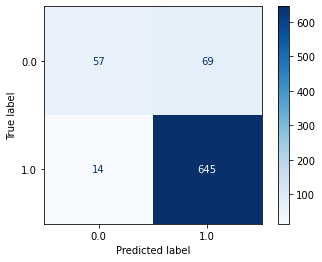

In [11]:
preds_test = logreg.predict(X_test)

confusion_matrix(y_test, # True values.
                 preds_test)  # Predicted values.

plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', 
                      values_format='d');

In [12]:
accuracy_score(y_test, preds_test)

0.8942675159235669

In [13]:
X.columns

Index(['Pct_Hesitant_Feb22', 'Pct_Somewhat_Hesitant_Feb22',
       'Pct_Highly_Hesitant_Feb22', 'Dose1_Pop_Pct_030121',
       'Dose1_Pop_Pct_030122', 'Dose1_Pop_Pct_090121_impute',
       'Series_Complete_Pop_Pct_030121', 'Series_Complete_Pop_Pct_090121',
       'Series_Complete_Pop_Pct_030122', 'Booster_Doses_Vax_Pct_030122',
       'Census2019_Pct_65Plus', 'SVI_Ctgy'],
      dtype='object')

In [14]:
pd.DataFrame(logreg.coef_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.087625,1.638091,5.452675,0.023651,-0.02575,0.01421,0.112797,-0.048954,-0.040482,0.0256,2.717963,-0.5396


### Random Forest Classifier

In [15]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [20, 40, 50, 100],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [2,3]
    
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8971477616659891


{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}

89.2% accurate, 6% better than baseline model 

In [16]:
train_score = gs.score(X_train, y_train) 
test_score = gs.score(X_test, y_test) 
crossvalscore= cross_val_score(gs, X_train, y_train).mean() 

print(f'rf train score is {train_score}')
print(f'rf test score is {test_score}')
print(f'rf cross val score mean is {crossvalscore}')

rf train score is 0.9192520186995325
rf test score is 0.8993630573248408
rf cross val score mean is 0.8945981840357773


Random Forest results: 5.6% more accurate than the baseline model.  No different really than Logreg.  Can we improve with Stacking with multiple classifier models?

#### Stacking

In [17]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('knn', make_pipeline(StandardScaler(),KNeighborsClassifier())),
             ('bag', BaggingClassifier()),
             ('ridge', make_pipeline(StandardScaler(),RidgeClassifier()))]

stack = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())

In [18]:
stack.fit(X_train, y_train)
stack.score(X_train, y_train), stack.score(X_test, y_test), cross_val_score(stack, X_train, y_train).mean()

(0.9511262218444538, 0.8968152866242038, 0.9022523377151377)

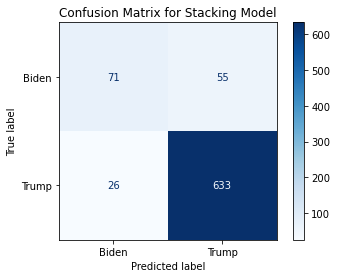

In [24]:
stack_preds_test = stack.predict(X_test)

confusion_matrix(y_test, # True values.
                 stack_preds_test)  # Predicted values.

plot_confusion_matrix(stack, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels = ['Biden', 'Trump'])
plt.title('Confusion Matrix for Stacking Model')
plt.savefig('../graphs/classification_conf_matrix.png');

Stacking results: 90.3 accuracy! Some improvement and now 7.2% better than the baseline model.  Would throwing more features in via polynomials improve the model?

#### Stacking, with polynomial features

In [ ]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X_poly, y, random_state = 33)

In [ ]:
estimators = [('rf', RandomForestClassifier()),
              ('knn', make_pipeline(StandardScaler(),KNeighborsClassifier())),
             ('bag', BaggingClassifier()),
             ('ridge', make_pipeline(StandardScaler(),RidgeClassifier()))]

stack = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())

In [ ]:
stack.fit(X_train, y_train)
stack.score(X_train, y_train), stack.score(X_test, y_test), cross_val_score(stack, X_train, y_train).mean()

In [ ]:
Stacking w/ polynomials results: actually a slight dip in performance.  Stick with previous stacking model without polynomials.

#### Results: best classification model was using Stacking.  That model had 90.3% accuracy, about 7% better than the baseline model.